# Анализ рынка недвижимости

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. В рамках проекта необходимо определить рыночную стоимость объектов недвижимости. Для этого проведём исследовательский анализ данных и установим параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

<h1>План работы<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откроем-файл-с-данными-и-изучим-общую-информацию" data-toc-modified-id="Откроем-файл-с-данными-и-изучим-общую-информацию-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откроем файл с данными и изучим общую информацию</a></span><ul class="toc-item"><li><span><a href="#Импортируем-библиотеку-pandas.-Считаем-данные-из-csv-файла-в-датафрейм-и-сохраним-в-переменную-df." data-toc-modified-id="Импортируем-библиотеку-pandas.-Считаем-данные-из-csv-файла-в-датафрейм-и-сохраним-в-переменную-df.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную df.</a></span></li><li><span><a href="#Выведем-первые-10-строчек-датафрейма-df-на-экран." data-toc-modified-id="Выведем-первые-10-строчек-датафрейма-df-на-экран.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Выведем первые 10 строчек датафрейма df на экран.</a></span></li><li><span><a href="#Выведем-основную-информацию-о-датафрейме-с-помощью-метода-info()" data-toc-modified-id="Выведем-основную-информацию-о-датафрейме-с-помощью-метода-info()-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Выведем основную информацию о датафрейме с помощью метода info()</a></span></li><li><span><a href="#Построим-гистограмму-для-всех-числовых-столбцов-таблицы-на-одном-графике." data-toc-modified-id="Построим-гистограмму-для-всех-числовых-столбцов-таблицы-на-одном-графике.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Построим гистограмму для всех числовых столбцов таблицы на одном графике.</a></span></li><li><span><a href="#Проверим,-имеются-ли-дубликаты-в-таблице" data-toc-modified-id="Проверим,-имеются-ли-дубликаты-в-таблице-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Проверим, имеются ли дубликаты в таблице</a></span></li></ul></li><li><span><a href="#Выполним-предобработку-данных" data-toc-modified-id="Выполним-предобработку-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Выполним предобработку данных</a></span><ul class="toc-item"><li><span><a href="#Получим-перечень-названий-столбцов-и-переименуем-столбцы-для-удобства-дальнейшей-работы." data-toc-modified-id="Получим-перечень-названий-столбцов-и-переименуем-столбцы-для-удобства-дальнейшей-работы.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Получим перечень названий столбцов и переименуем столбцы для удобства дальнейшей работы.</a></span></li><li><span><a href="#Найдём-и-изучим-пропущенные-значения-в-столбцах" data-toc-modified-id="Найдём-и-изучим-пропущенные-значения-в-столбцах-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Найдём и изучим пропущенные значения в столбцах</a></span></li><li><span><a href="#Заполним-пропущенные-значения" data-toc-modified-id="Заполним-пропущенные-значения-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Заполним пропущенные значения</a></span></li><li><span><a href="#Рассмотрим-типы-данных-в-каждом-столбце-и-преобразуем-их-при-необходимости" data-toc-modified-id="Рассмотрим-типы-данных-в-каждом-столбце-и-преобразуем-их-при-необходимости-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Рассмотрим типы данных в каждом столбце и преобразуем их при необходимости</a></span></li><li><span><a href="#Изучим-уникальные-значения-в-столбце-с-названиями-населённых-пунктов-locality_name-и-устраним-неявные-дубликаты." data-toc-modified-id="Изучим-уникальные-значения-в-столбце-с-названиями-населённых-пунктов-locality_name-и-устраним-неявные-дубликаты.-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Изучим уникальные значения в столбце с названиями населённых пунктов <code>locality_name</code> и устраним неявные дубликаты.</a></span></li></ul></li><li><span><a href="#Добавим-в-таблицу-новые-столбцы" data-toc-modified-id="Добавим-в-таблицу-новые-столбцы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Добавим в таблицу новые столбцы</a></span><ul class="toc-item"><li><span><a href="#Цена-одного-квадратного-метра" data-toc-modified-id="Цена-одного-квадратного-метра-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Цена одного квадратного метра</a></span></li><li><span><a href="#День-недели-публикации-объявления" data-toc-modified-id="День-недели-публикации-объявления-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>День недели публикации объявления</a></span></li><li><span><a href="#Месяц-публикации-объявления" data-toc-modified-id="Месяц-публикации-объявления-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Месяц публикации объявления</a></span></li><li><span><a href="#Год-публикации-объявления" data-toc-modified-id="Год-публикации-объявления-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Год публикации объявления</a></span></li><li><span><a href="#Тип-этажа-квартиры-(значения-—-«первый»,-«последний»,-«другой»)" data-toc-modified-id="Тип-этажа-квартиры-(значения-—-«первый»,-«последний»,-«другой»)-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Тип этажа квартиры (значения — «первый», «последний», «другой»)</a></span></li><li><span><a href="#Расстояние-до-центра-города-в-километрах" data-toc-modified-id="Расстояние-до-центра-города-в-километрах-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Расстояние до центра города в километрах</a></span></li></ul></li><li><span><a href="#Проведём-исследовательский-анализ-данных" data-toc-modified-id="Проведём-исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проведём исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучим-параметры-объектов-недвижимости-и-построим-гистограммы" data-toc-modified-id="Изучим-параметры-объектов-недвижимости-и-построим-гистограммы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучим параметры объектов недвижимости и построим гистограммы</a></span><ul class="toc-item"><li><span><a href="#Общая-площадь" data-toc-modified-id="Общая-площадь-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Общая площадь</a></span></li><li><span><a href="#Жилая-площадь" data-toc-modified-id="Жилая-площадь-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Жилая площадь</a></span></li><li><span><a href="#Площадь-кухни" data-toc-modified-id="Площадь-кухни-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Площадь кухни</a></span></li><li><span><a href="#Цена-объекта" data-toc-modified-id="Цена-объекта-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Цена объекта</a></span></li><li><span><a href="#Количества-комнат" data-toc-modified-id="Количества-комнат-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Количества комнат</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-4.1.6"><span class="toc-item-num">4.1.6&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Тип-этажа-квартиры-(&quot;первый&quot;,-&quot;второй&quot;,-&quot;последний&quot;)" data-toc-modified-id="Тип-этажа-квартиры-(&quot;первый&quot;,-&quot;второй&quot;,-&quot;последний&quot;)-4.1.7"><span class="toc-item-num">4.1.7&nbsp;&nbsp;</span>Тип этажа квартиры ("первый", "второй", "последний")</a></span></li><li><span><a href="#Общее-количества-этажей-в-доме" data-toc-modified-id="Общее-количества-этажей-в-доме-4.1.8"><span class="toc-item-num">4.1.8&nbsp;&nbsp;</span>Общее количества этажей в доме</a></span></li><li><span><a href="#Расстояние-до-центра-города-(в-метрах)" data-toc-modified-id="Расстояние-до-центра-города-(в-метрах)-4.1.9"><span class="toc-item-num">4.1.9&nbsp;&nbsp;</span>Расстояние до центра города (в метрах)</a></span></li><li><span><a href="#Расстояние-до-ближайшего-парка-(в-метрах)" data-toc-modified-id="Расстояние-до-ближайшего-парка-(в-метрах)-4.1.10"><span class="toc-item-num">4.1.10&nbsp;&nbsp;</span>Расстояние до ближайшего парка (в метрах)</a></span></li></ul></li><li><span><a href="#Изучим,-как-быстро-продавались-квартиры" data-toc-modified-id="Изучим,-как-быстро-продавались-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучим, как быстро продавались квартиры</a></span><ul class="toc-item"><li><span><a href="#Построим-гистограмму" data-toc-modified-id="Построим-гистограмму-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Построим гистограмму</a></span></li><li><span><a href="#Посчитаем-среднее-и-медиану" data-toc-modified-id="Посчитаем-среднее-и-медиану-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Посчитаем среднее и медиану</a></span></li></ul></li><li><span><a href="#Определим-какие-факторы-больше-всего-влияют-на-общую(полную)-стоимость-объекта." data-toc-modified-id="Определим-какие-факторы-больше-всего-влияют-на-общую(полную)-стоимость-объекта.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Определим какие факторы больше всего влияют на общую(полную) стоимость объекта.</a></span><ul class="toc-item"><li><span><a href="#Общая-площадь" data-toc-modified-id="Общая-площадь-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Общая площадь</a></span></li><li><span><a href="#Жилая-площадь" data-toc-modified-id="Жилая-площадь-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Жилая площадь</a></span></li><li><span><a href="#Площадь-кухни" data-toc-modified-id="Площадь-кухни-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Площадь кухни</a></span></li><li><span><a href="#Количество-комнат" data-toc-modified-id="Количество-комнат-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Количество комнат</a></span></li><li><span><a href="#Этаж,-на-котором-расположена-квартира-(первый,-последний,-другой)" data-toc-modified-id="Этаж,-на-котором-расположена-квартира-(первый,-последний,-другой)-4.3.5"><span class="toc-item-num">4.3.5&nbsp;&nbsp;</span>Этаж, на котором расположена квартира (первый, последний, другой)</a></span></li><li><span><a href="#Дата-размещения-объявления" data-toc-modified-id="Дата-размещения-объявления-4.3.6"><span class="toc-item-num">4.3.6&nbsp;&nbsp;</span>Дата размещения объявления</a></span><ul class="toc-item"><li><span><a href="#День-недели" data-toc-modified-id="День-недели-4.3.6.1"><span class="toc-item-num">4.3.6.1&nbsp;&nbsp;</span>День недели</a></span></li><li><span><a href="#Месяц" data-toc-modified-id="Месяц-4.3.6.2"><span class="toc-item-num">4.3.6.2&nbsp;&nbsp;</span>Месяц</a></span></li><li><span><a href="#Год" data-toc-modified-id="Год-4.3.6.3"><span class="toc-item-num">4.3.6.3&nbsp;&nbsp;</span>Год</a></span></li></ul></li></ul></li><li><span><a href="#Посчитаем-среднюю-цену-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений.-Построим-сводную-таблицу-с-количеством-объявлений-и-средней-ценой-квадратного-метра-для-этих-населённых-пунктов.-Выделим-населённые-пункты-с-самой-высокой-стоимостью-квадратного-метра." data-toc-modified-id="Посчитаем-среднюю-цену-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений.-Построим-сводную-таблицу-с-количеством-объявлений-и-средней-ценой-квадратного-метра-для-этих-населённых-пунктов.-Выделим-населённые-пункты-с-самой-высокой-стоимостью-квадратного-метра.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населённых пунктов. Выделим населённые пункты с самой высокой стоимостью квадратного метра.</a></span></li><li><span><a href="#Выделим-квартиры-в-Санкт-Петербурге-с-помощью-столбца-locality_name-и-вычислим-их-среднюю-стоимость-на-разном-удалении-от-центра.-Учтём-каждый-километр-расстояния:-узнаем-среднюю-цену-квартир-в-одном-километра-от-центра,-в-двух-и-т.д.-Опишем,-как-стоимость-объектов-зависит-от-расстояния-до-центра-города---построим-график-изменения-цены-для-каждого-километра--от-центра-Санкт-Петербурга" data-toc-modified-id="Выделим-квартиры-в-Санкт-Петербурге-с-помощью-столбца-locality_name-и-вычислим-их-среднюю-стоимость-на-разном-удалении-от-центра.-Учтём-каждый-километр-расстояния:-узнаем-среднюю-цену-квартир-в-одном-километра-от-центра,-в-двух-и-т.д.-Опишем,-как-стоимость-объектов-зависит-от-расстояния-до-центра-города---построим-график-изменения-цены-для-каждого-километра--от-центра-Санкт-Петербурга-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Выделим квартиры в Санкт-Петербурге с помощью столбца <code>locality_name</code> и вычислим их среднюю стоимость на разном удалении от центра. Учтём каждый километр расстояния: узнаем среднюю цену квартир в одном километра от центра, в двух и т.д. Опишем, как стоимость объектов зависит от расстояния до центра города - построим график изменения цены для каждого километра  от центра Санкт-Петербурга</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

***Описание данных***

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

### Откроем файл с данными и изучим общую информацию

#### Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную df. 
Путь к файлу: `/datasets/real_estate_data.csv`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

#### Выведем первые 10 строчек датафрейма df на экран.

In [2]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Выведем основную информацию о датафрейме с помощью метода info()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Построим гистограмму для всех числовых столбцов таблицы на одном графике. 

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

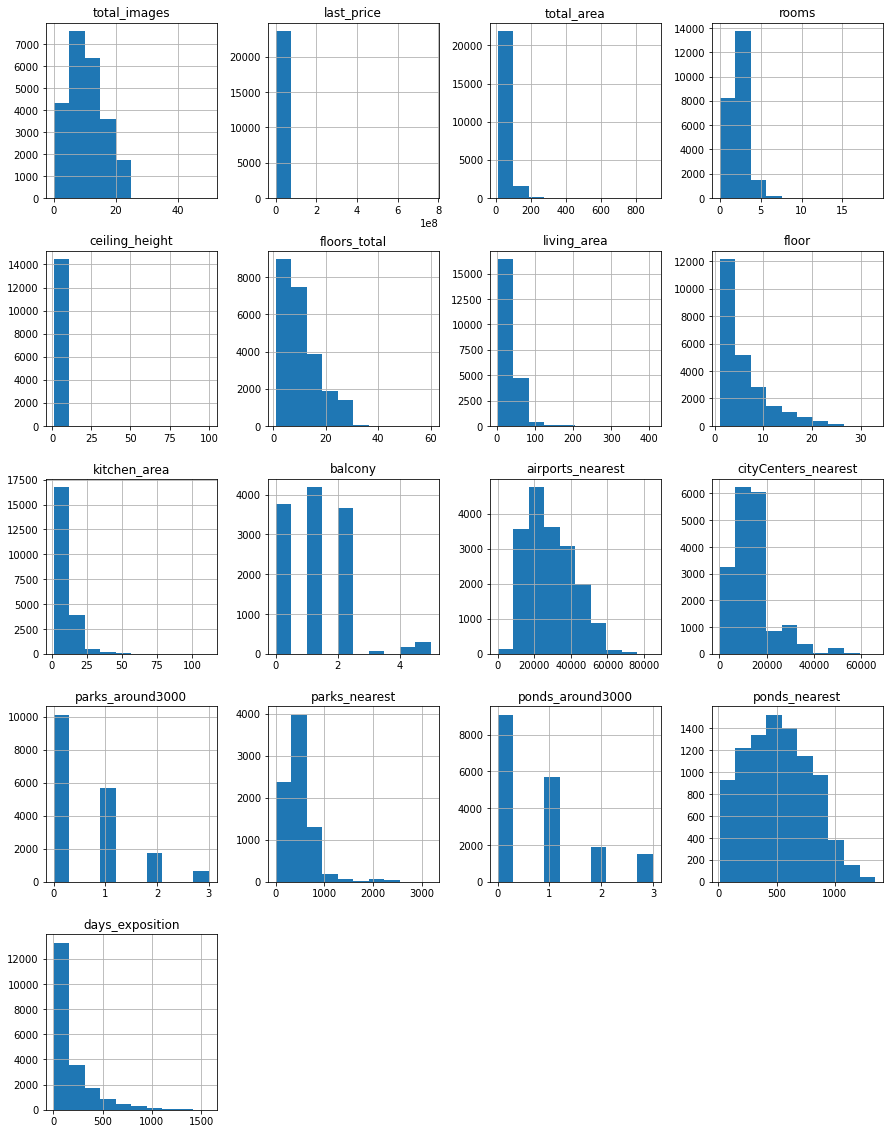

In [4]:
df.hist(figsize=(15, 20))

По графикам видно, что в столбцах `last_price`, `total_area`, `rooms`, `ceiling_height`, `living_area`, `kitchen_area` присутствуют выбросы или аномалии.

#### Проверим, имеются ли дубликаты в таблице

In [5]:
df.duplicated().sum()

0

**Вывод**

* датасет состоит из 23 699 строк, в некоторых из них, присутствуют пропущенные значения
* присутствуют столбцы, в которых необходимо изменить тип данных на соответствующий их содержанию
* в столбце `locality_name` нужно выполнить поиск неявных дубликатов
* в столбцах `last_price`, `total_area`, `rooms`, `ceiling_height`, `living_area`, `kitchen_area` присутствуют выбросы или аномалии
* строки-дубликаты отсутствуют

### Выполним предобработку данных

#### Получим перечень названий столбцов и переименуем столбцы для удобства дальнейшей работы.

In [6]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Приведём название столбца `cityCenters_nearest` к "змеиному регистру"

In [7]:
df = df.rename(
    columns={
        'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 
        'ponds_around3000': 'ponds_around_3000'
    }
)

#### Найдём и изучим пропущенные значения в столбцах

Выведем количество пропущенных значений для каждого столбца

In [8]:
df.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around_3000        5518
parks_around_3000        5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Выведем долю пропущенных значений для каждого столбца

In [9]:
df.isna().mean().sort_values(ascending=False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
city_centers_nearest    0.232879
ponds_around_3000       0.232837
parks_around_3000       0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

Исследуем столбцы `parks_around_3000` - число парков в радиусе 3 км и `parks_nearest` - расстояние до ближайшего парка, `ponds_around_3000` - число водоёмов в радиусе 3 км, `ponds_nearest` - расстояние до ближайшего водоёма, `city_centers_nearest` -  расстояние до центра города и `airports_nearest` - расстояние до ближайшего аэропорта, у них указано схожее число пропущенных данных. Предположим, что это одни и те же объекты.

In [10]:
df[df['parks_around_3000'].isna() & df['parks_nearest'].isna() & 
   df['ponds_around_3000'].isna() & df['ponds_nearest'].isna() &
  df['city_centers_nearest'].isna() & df['airports_nearest'].isna()]['ponds_around_3000'].isna().sum()

5518

Действительно, 5518 объектов у которых пропущены данные в столбцах: `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest`, `parks_around3000`, `ponds_around3000` - не указано, количество парков и водоёмов в радиусе 3 км, у них же не указано расстояние до ближайшего парка и водоёма, центра города и аэропорта, все эти данные заполняются без участия пользователя, причиной пропуска данных в этих столбцах мог быть технический сбой или ошибка в работе программного обеспечения. 

У 3181 объектов отсутствуют данные в столбце `days_exposition`, возможно, что эти объекты еще не проданы и поэтому есть пропуски.

В столбцах: `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name` - данные заполняют пользователи, возможно пользователь пропустил эти пункты, данные были утеряны в результате какого-либо технического сбоя или отсутствием данных человек хотел указать нулевое значение этого параметра.

#### Заполним пропущенные значения

Столбец `balcony` - хранит число балконов в объекте недвижимости. Предположим, что в этих объектах нет балкона, поэтому продавец их пропустил, заполним пропущенные данные в этих столбцах на `0`.

In [11]:
df['balcony'] = df['balcony'].fillna(0)

Столбец `is_apartment` - признак того, что данный объект является апартаментами. Предположим, что эти объекты не являются апартаментами, поэтому продавец их пропустил, заполним пропущенные данные значением `False`.

In [12]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Столбец `ceiling_height` - хранит высоту потолков в объекте недвижимости. Заполним его медианным значением.

In [13]:
df['ceiling_height']=df['ceiling_height'].fillna(df['ceiling_height'].median())

Напишем функцию для создания категорий объектов в зависимости от их общей площади.

In [14]:
def total_area_category(total_area):
    return total_area//10

Применим функцию к датафрейму

In [15]:
df['total_area_category'] = df['total_area'].apply(total_area_category)

Вычислим медианное значение `kitchen_area` для каждой категории по общей площади

In [16]:
median_values = df.groupby('total_area_category')['kitchen_area'].median()

Заполним пропущенные значения в столбце `kitchen_area`, медианным значением

In [17]:
for category, median_value in median_values.items():
    df.loc[df['total_area_category'] == category, 'kitchen_area'] = \
    df.loc[df['total_area_category'] == category, 'kitchen_area'].fillna(median_value)

Вычислим медианное значение `living_area` для каждой категории по общей площади

In [18]:
median_values = df.groupby('total_area_category')['living_area'].median()

Заполним пропущенные значения в столбце `living_area`, медианным значением

In [19]:
for category, median_value in median_values.items():
    df.loc[df['total_area_category'] == category, 'living_area'] = \
    df.loc[df['total_area_category'] == category, 'living_area'].fillna(median_value)

Вновь выведем доли пропущенных значений для каждого столбца

In [20]:
df.isna().mean().sort_values(ascending=False)

parks_nearest           0.659100
ponds_nearest           0.615596
airports_nearest        0.233850
city_centers_nearest    0.232879
ponds_around_3000       0.232837
parks_around_3000       0.232837
days_exposition         0.134225
floors_total            0.003629
locality_name           0.002068
living_area             0.000084
kitchen_area            0.000042
total_images            0.000000
balcony                 0.000000
open_plan               0.000000
last_price              0.000000
studio                  0.000000
is_apartment            0.000000
floor                   0.000000
ceiling_height          0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
total_area_category     0.000000
dtype: float64

#### Рассмотрим типы данных в каждом столбце и преобразуем их при необходимости

In [21]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around_3000       float64
parks_nearest           float64
ponds_around_3000       float64
ponds_nearest           float64
days_exposition         float64
total_area_category     float64
dtype: object

Преобразуем данные в столбце `last_price` из рублей в тысячи рублей

In [22]:
df['last_price'] = (df['last_price']/1000).astype(int, errors='ignore')
df['last_price']

0        13000
1         3350
2         5196
3        64900
4        10000
         ...  
23694     9700
23695     3100
23696     2500
23697    11475
23698     1350
Name: last_price, Length: 23699, dtype: int64

Преобразуем тип данных в столбце `first_day_exposition` в  `datetime`

In [23]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

Снова проверим типы данных

In [24]:
df.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
total_area_category            float64
dtype: object

В `last_price` содержались данные в рублях, мы перевели их в тысячи рублей для удобного восприятия данных. В столбце `first_day_exposition`, содержались данные типа `object`, мы преобразовали их в тип `datetime`, для того, чтобы с ними можно было проводить арифметические операции. 

#### Изучим уникальные значения в столбце с названиями населённых пунктов `locality_name` и устраним неявные дубликаты.

Выведим на экран перечень уникальных названий населённых пунктов из столбца `locality_name`.

In [25]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Создадим новый столбец `locality_name_no_dub`, в котором не будет дубликатов

In [26]:
df['locality_name_no_dub'] = (
    df['locality_name'].str.lower()
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'городской поселок', 'поселок при железнодорожной станции'], 'поселок', regex=True)
)

**Вывод**
    
* В  нашем датасете присутствует большое количество объектов, у которых пропущена часть данных. Например, из 23699 строк, в 20924 не указан признак того, что данный объект является апартаментами, у 15620 не указано расстояние до ближайшего парка. Часть данных мы предположили, что пропущена, потому что на их месте должен стоять 0 и заполнили их, часть данных заполнили медианным значением, которое в дальнейшем позволит меньше исказить распределение данных, в сравнении с  заполнением средним значением.
* В столбе `last_price` мы перевели данные в тысячи рублей для их более удобного восприятия. В столбце `first_day_exposition` мы преобразовали данные тип `datetime`, для того, чтобы с ними можно было проводить арифметические операции.       
* В столбце `locality_name` мы избавились от неявных дубликатов

### Добавим в таблицу новые столбцы

#### Цена одного квадратного метра

Поделим стоимость объекта на его общую площадь, а затем округлим до двух знаков после запятой

In [27]:
df['price_per_square_meter'] = round(df['last_price']/df['total_area'],2)

#### День недели публикации объявления

0 — понедельник, 1 — вторник и так далее

In [28]:
df['first_day_of_week_exposition'] = df['first_day_exposition'].dt.weekday

#### Месяц публикации объявления

In [29]:
df['first_month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month

#### Год публикации объявления

In [30]:
df['first_year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year

#### Тип этажа квартиры (значения — «первый», «последний», «другой»)

Создадим функцию, которая распределяет этажи по типам.

In [31]:
def define_floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

Применим функцию к нашему датасету

In [32]:
df['floor_type'] = df.apply(define_floor_type, axis=1)

#### Расстояние до центра города в километрах

Переведём из м в км и округлим до ближайших целых значений

In [33]:
df['city_centers_nearest_km'] = (df['city_centers_nearest'] / 1000).round()

**Вывод**

В наш датасет мы добавили новые столбцы: цена одного квадратного метра - `price_per_square_meter`, день недели публикации объявления - `first_day_of_week_exposition`, месяц публикации объявления - `first_month_exposition`, год публикации объявления - `first_year_exposition`, тип этажа квартиры (значения — «первый», «последний», «другой») - `floor_type`, расстояние до центра города в километрах - `city_centers_nearest_km`

### Проведём исследовательский анализ данных

#### Изучим параметры объектов недвижимости и построим гистограммы

##### Общая площадь

Изучим список характерных значений столбца `total_area`

In [34]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Построим гистограмму

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

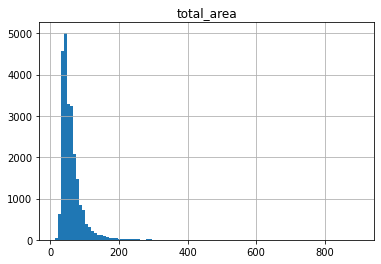

In [35]:
df.hist('total_area', range=(12, 900), bins=100)

Объекты недвижимости с общей площадью более 175 квадратных метров - уже редки, более 250 уже начинают сливаться с нулём. Примем верхнюю границу в 200 квадратных метров. Объекты недвижимости с общей площадью 200 квадратных метров встречаются редко, если отбросить эти значения, то много данных не потеряется.

Сохраним в переменную `count` исходное количество строк в датафрейме, чтобы в последующем рассчитать процент удалённых выбросов и аномальных значений.

In [36]:
count = df['last_price'].count()

In [37]:
df = df.query('total_area<200')

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

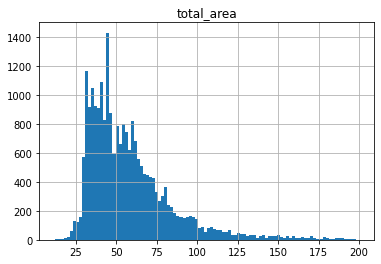

In [38]:
df.hist('total_area', range=(12, 200), bins=100)

Большинство объектов недвижимости имеют общую площадь от 40 до 70 квадратных метров.

##### Жилая площадь

Изучим список характерных значений столбца `living_area`

In [39]:
df['living_area'].describe()

count    23468.000000
mean        33.359534
std         17.336172
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

Построим гистограмму

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

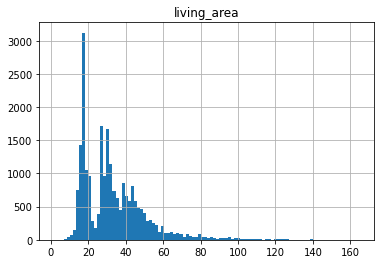

In [40]:
df.hist('living_area', range=(2, 164.7), bins=100)

Объекты недвижимости с жилой площадью более 80 квадратных метров - уже редки, более 120 уже начинают сливаться с нулём. Примем верхнюю границу в 100 квадратных метров. Объекты недвижимости с жилой площадью 100 квадратных метров встречаются редко, если отбросить эти значения, то много данных не потеряется.

In [41]:
df = df.query('living_area<100')

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

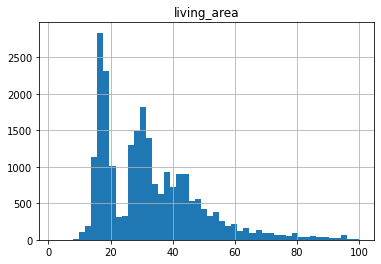

In [42]:
df.hist('living_area', range=(2, 100), bins=50)

В большинстве объектов недвижимости жилая площадь находится в диапозоне от 18.6 до 42 квадратных метров, но объектов с жилой площадью от 20 до 26 встречается не много.

##### Площадь кухни

Изучим список характерных значений столбца `kitchen_area`

In [43]:
df['kitchen_area'].describe()

count    23271.000000
mean        10.185955
std          5.113097
min          1.300000
25%          7.000000
50%          9.000000
75%         11.500000
max         93.200000
Name: kitchen_area, dtype: float64

Построим гистограмму

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

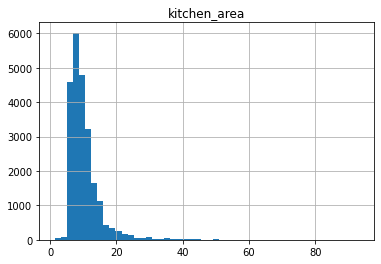

In [44]:
df.hist('kitchen_area', range=(1.3, 93.2), bins=50)

Объекты недвижимости с площадью кухни более 30 квадратных метров - уже редки, более 45 уже начинают сливаться с нулём. Примем верхнюю границу в 40 квадратных метров. Объекты недвижимости с площадью кухни более 40 квадратных метров встречаются редко, если отбросить эти значения, то много данных не потеряется.

In [45]:
df = df.query('kitchen_area<40')

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

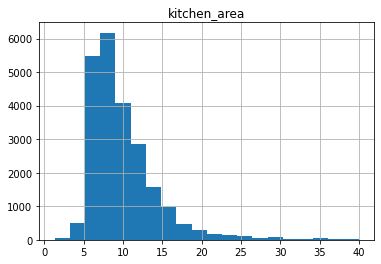

In [46]:
df.hist('kitchen_area', range=(1.3, 40), bins=20)

В большинстве объектов недвижимости площадь кухни от 7 до 11.5 квадратных метров.

##### Цена объекта

Изучим список характерных значений столбца `last_price`

In [47]:
df['last_price'].describe()

count     23164.000000
mean       5773.072785
std        5167.004433
min         430.000000
25%        3400.000000
50%        4590.000000
75%        6549.250000
max      289238.000000
Name: last_price, dtype: float64

Построим гистограмму

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

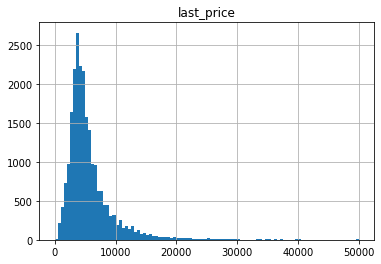

In [48]:
df.hist('last_price', range=(0, 50000), bins=100)

Объекты недвижимости стоимостью 20 000 т. - уже редки, более 30 000 т. уже начинают сливаться с нулём. Примем верхнюю границу в 25 000 т. Объекты стоимостью более 25 000 т. встречаются редко, если отбросить эти значения, то много данных не потеряется.

In [49]:
df = df.query('last_price<25000')

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

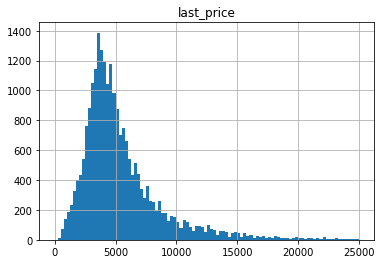

In [50]:
df.hist('last_price', range=(0, 25000), bins=100)

Стоимость большинства объектов недвижимости от 3.4 миллиона рублей до 6.5.

##### Количества комнат

Изучим список характерных значений столбца `rooms`

In [51]:
df['rooms'].describe()

count    22933.000000
mean         1.993852
std          0.947794
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

Построим гистограмму

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

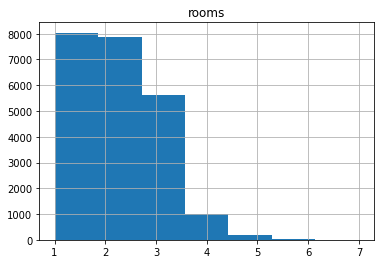

In [52]:
df.hist('rooms', range=(1, 7) ,bins=7)

Исходя из графика, мы можем сделать вывод, что объектов недвижимости с 1 и 2 комнатами примерно равное количество, с 3 комнатами чуть меньше, с 4 комнатами совсем мало, а остальные встречаются достаточно редко.

##### Высота потолков

Изучим список характерных значений столбца `ceiling_height`

In [53]:
df['ceiling_height'].describe()

count    22933.000000
mean         2.713851
std          0.999661
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Построим гистограмму

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

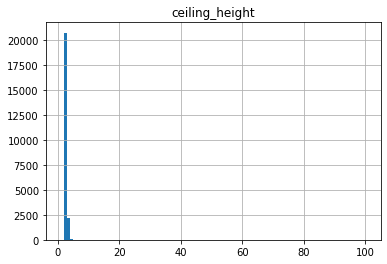

In [54]:
df.hist('ceiling_height', bins=100)

Рассмотрим подробнее имеющиеся данные в этом столбце:

In [55]:
df['ceiling_height'].unique()

array([  2.7 ,   2.65,   2.5 ,   2.67,   2.56,   3.05,   2.75,   2.6 ,
         2.9 ,   2.8 ,   2.55,   3.  ,   2.61,   3.2 ,   3.25,   3.45,
         2.77,   2.64,   2.57,   4.15,   3.3 ,   2.71,   4.  ,   2.47,
         2.73,   2.84,   3.1 ,   2.34,   3.4 ,   3.5 ,   3.06,   2.72,
         2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,   3.7 ,   2.52,
         2.87,   2.66,   2.59,   2.  ,   2.85,   2.45,   2.92,   3.11,
         3.13,   3.8 ,   3.15,   3.55,   3.62,   3.12,   2.53,   2.96,
         2.46,   2.74,   5.  ,   2.79,   2.95,   4.06,   2.94,   3.54,
         3.53,   2.83,   2.4 ,   3.38,   3.01,   3.65,   3.18,   3.35,
         2.3 ,   2.48,   2.62,   3.57,   2.82,   3.98,   3.03,   2.63,
         3.83,   3.52,   3.75,   2.88,   3.67,   3.66,   4.19,   3.95,
         3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,  32.  ,   3.68,   3.07,
         3.37,   3.09,   8.  ,   3.16,   3.6 ,   3.26,   3.34,   2.81,
         3.44,   2.97,   4.37,   2.68,   3.9 ,   3.27,  27.  ,   4.1 ,
      

Похоже, что при внесении значений: 20, 22.6, 24, 25, 26, 27, 27.5, 32 - пользователь опечатался, разделим эти значения на 10.

Напишем функцию, которая сокращает высоту потолка в 10 раз

In [56]:
def ceiling_height_good(ceiling_height):
    if 20 <= ceiling_height <= 40:
        return ceiling_height/10
    return ceiling_height

Применим её

In [57]:
df['ceiling_height'] = df['ceiling_height'].apply(ceiling_height_good)

Объекты недвижимости с высотой потолка 3.5 м - уже редки, более 4.5 м уже начинают сливаться с нулём. Примем верхнюю границу в 4 м. Объекты с высотой потолка 4 м встречаются редко, высоту потолка менее 2 м будем считать аномальной, если отбросить эти значения, то много данных не потеряется.

Удалим аномальные значения и выбросы

In [58]:
df = df[(df['ceiling_height'] > 2) & (df['ceiling_height'] < 4)]

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

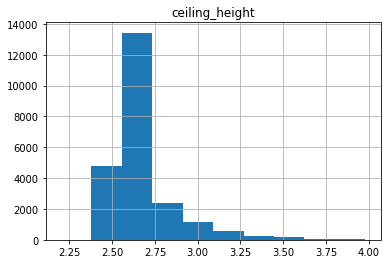

In [59]:
df.hist('ceiling_height', bins=10)

В большинстве объектов высота потолка находится в диапозоне от 2.6 до 2.7м

##### Тип этажа квартиры ("первый", "второй", "последний")

Изучим список характерных значений столбца `floor_type`

In [60]:
df['floor_type'].describe()

count      22853
unique         3
top       другой
freq       16842
Name: floor_type, dtype: object

Построим гистограмму

<AxesSubplot:>

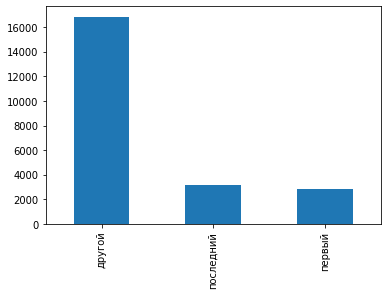

In [61]:
df.floor_type.value_counts().plot.bar()

Большинство объектов находится между первым и последним этажами.

##### Общее количества этажей в доме

Изучим список характерных значений столбца `floors_total`

In [62]:
df['floors_total'].describe()

count    22769.000000
mean        10.776187
std          6.632758
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Построим гистограмму

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

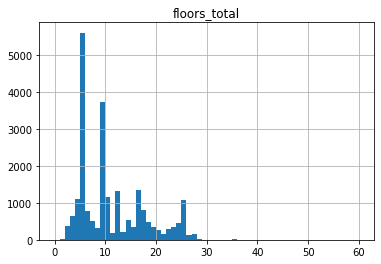

In [63]:
df.hist('floors_total', range=(0, 60), bins=60)

Объекты недвижимости в зданиях с 30 этажами - уже редки, более 30 уже начинают сливаться с нулём. Примем верхнюю границу в 30 этажей. Объекты в зданиях с 30 этажами встречаются редко, если отбросить эти значения, то много данных не потеряется.

In [64]:
df = df.query('floors_total<30')

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

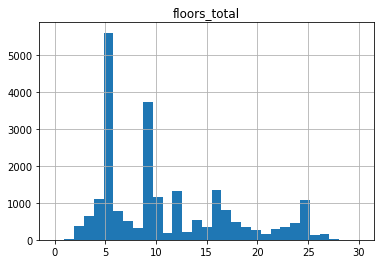

In [65]:
df.hist('floors_total', range=(0, 30), bins=31)

Большинство объектов недвижимости имеют от 5 до 16 этажей, в основном - 5 и 9 этажей, остальные встречаются существенно реже.

##### Расстояние до центра города (в метрах)

Изучим список характерных значений столбца `city_centers_nearest`

In [66]:
df['city_centers_nearest'].describe()

count    17269.000000
mean     14507.854190
std       8557.014576
min        208.000000
25%       9846.000000
50%      13271.000000
75%      16446.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Построим гистограмму

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

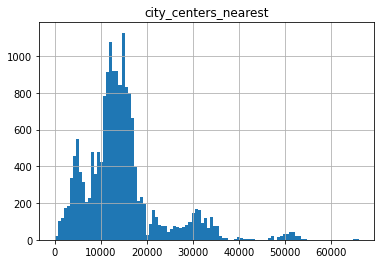

In [67]:
df.hist('city_centers_nearest', range=(0, 66000), bins=100)

Объекты недвижимости, которые находятся на расстоянии от центра более 40 000 м - уже редки, более 60 000 уже начинают сливаться с нулём.

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

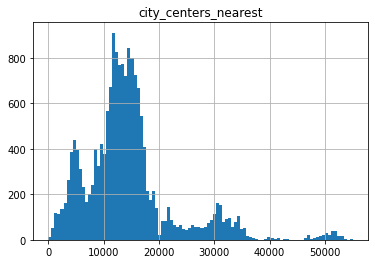

In [68]:
df.hist('city_centers_nearest', range=(0, 55000), bins=100)

Большинство объектов недвижимости располагается в диапозоне от 9.8 км до 16.4 км.

##### Расстояние до ближайшего парка (в метрах)

Изучим список характерных значений столбца `parks_nearest`

In [69]:
df['parks_nearest'].describe()

count    7487.000000
mean      494.865767
std       343.627600
min         1.000000
25%       290.000000
50%       456.000000
75%       616.500000
max      3190.000000
Name: parks_nearest, dtype: float64

Построим гистограмму

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

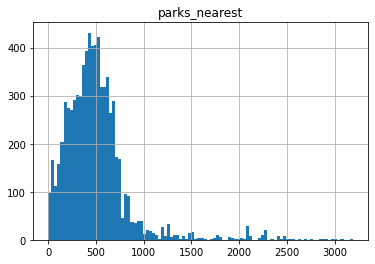

In [70]:
df.hist('parks_nearest', range=(1, 3190), bins=100)

Объекты недвижимости, которые находятся на расстоянии от парка более 1 500 м - уже редки, более 3 000 уже начинают сливаться с нулём. Примем верхнюю границу в 2 500 м.

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

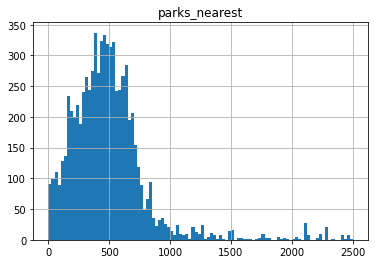

In [71]:
df.hist('parks_nearest', range=(1, 2500), bins=100)

Большинство объектов недвижимости распологается на расстоянии менее 650 м от парков.

Рассчитаем долю удалённых данных в качестве выбросов

In [72]:
cut_percentage = 1-df['last_price'].count()/count
print(f'Доля удаленных данных в качестве выбрсов составляет: {cut_percentage:.0%}')

Доля удаленных данных в качестве выбрсов составляет: 4%


#### Изучим, как быстро продавались квартиры

##### Построим гистограмму

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

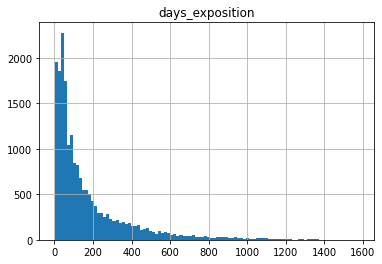

In [73]:
df.hist('days_exposition', bins=100)

##### Посчитаем среднее и медиану

In [74]:
df['days_exposition'].describe()

count    19798.000000
mean       177.269068
std        215.886109
min          1.000000
25%         44.000000
50%         93.000000
75%        225.000000
max       1580.000000
Name: days_exposition, dtype: float64

Чаще всего объекты недвижимости продаются за 93 дня. Быстрые продажи осуществлялись в период до 44 дней. Продажи от 225 дней можно считать необычайно долгими.

#### Определим какие факторы больше всего влияют на общую(полную) стоимость объекта. 

Построим графики для визуализации зависимости цены от изученных нами параметров.

##### Общая площадь

Построим диаграмму рассеяния

Text(0.5, 1.0, 'Влияние общей площади объекта на цену')

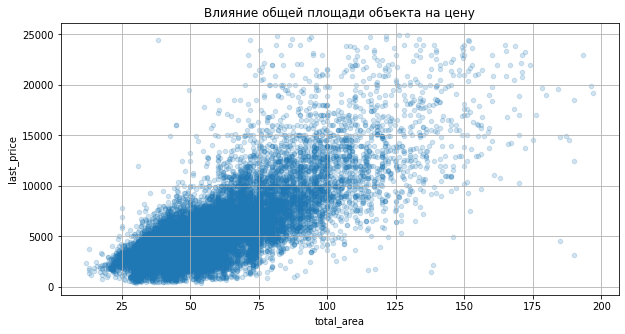

In [75]:
df.plot(x='total_area', y='last_price',kind='scatter', grid=True, figsize=(10,5), alpha=0.2)
plt.title('Влияние общей площади объекта на цену', fontsize=12)

Вычислим коэффициент Пирсона

In [76]:
df['total_area'].corr(df['last_price'])

0.7671600731358905

Коэффициент корреляции 0.76 говорит о том, что есть относительно сильная связь между общей площадью и ценой, но не является абсолютной. Он может помочь в прогнозировании цены на недвижимость на основе её общей площади, но необходимо учитывать и другие факторы для более точной оценки.

##### Жилая площадь

Построим диаграмму рассеяния

Text(0.5, 1.0, 'Влияние жилой площади на цену')

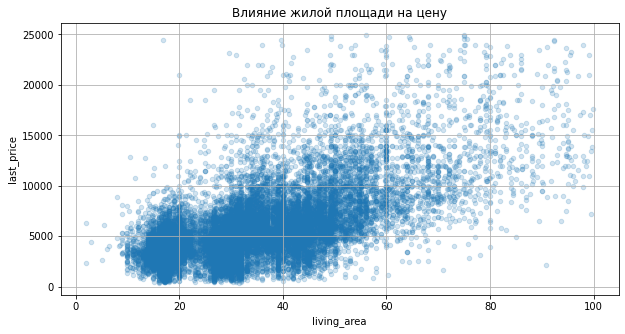

In [77]:
df.plot(x='living_area', y='last_price',kind='scatter', grid=True, figsize=(10,5), alpha=0.2)
plt.title('Влияние жилой площади на цену', fontsize=12)

Вычислим коэффициент Пирсона

In [78]:
df['living_area'].corr(df['last_price'])

0.6554322263176884

Кооэффициент корреляции 0.65 между жилой площадью и ценой недвижимости говорит о наличии умеренной положительной линейной зависимости между этими двумя переменными. Это означает, что при увеличении жилой площади цена недвижимости также склонна увеличиваться.

##### Площадь кухни

Построим диаграмму рассеяния

Text(0.5, 1.0, 'Влияние площади кухни на цену')

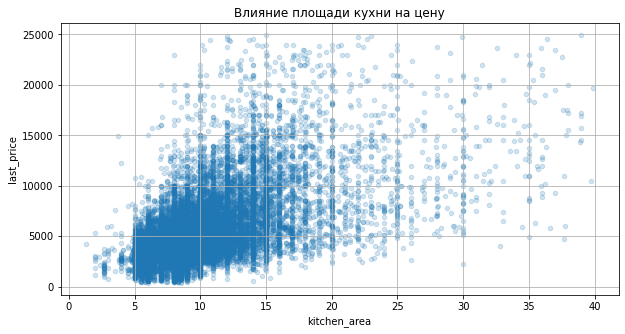

In [79]:
df.plot(x='kitchen_area', y='last_price',kind='scatter', grid=True, figsize=(10,5), alpha=0.2)
plt.title('Влияние площади кухни на цену', fontsize=12)

Вычислим коэффициент Пирсона

In [80]:
df['kitchen_area'].corr(df['last_price'])

0.5816682249629404

Коэффициент корреляции, равный 0.58 говорит о том, что существует умеренная положительная связь между площадью кухни и ценой недвижимости. Это означает, что, в среднем, с увеличением площади кухни вероятно также увеличивается и цена недвижимости. Однако стоит отметить, что это не такая сильная связь, как между общей площадью и ценой.

##### Количество комнат

Построим диаграмму рассеяния

Text(0.5, 1.0, 'Влияние количества комнат на цену')

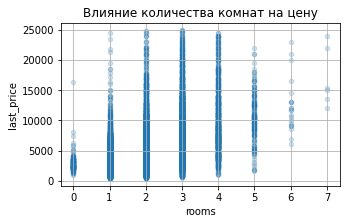

In [81]:
df.plot(x='rooms', y='last_price',kind='scatter', grid=True, figsize=(5,3), alpha=0.2)
plt.title('Влияние количества комнат на цену', fontsize=12)

Вычислим коэффициент Пирсона

In [82]:
df['rooms'].corr(df['last_price'])

0.47554751103599435

Корреляция коэффициента 0.48 между количеством комнат и ценой говорит о том, что существует некоторая положительная связь между этими двумя переменными. Однако корреляция не слишком высока, что указывает на то, что количество комнат не является единственным или основным фактором, определяющим цену квартиры. Вероятно, другие факторы также оказывают влияние на цену.

##### Этаж, на котором расположена квартира (первый, последний, другой)

Сгруппируем данные по типу этажа, на котором расположена квартира, вычислим медианное значение и построим график

Text(0.5, 1.0, 'Влияние этажа, на котором расположена квартира на цену')

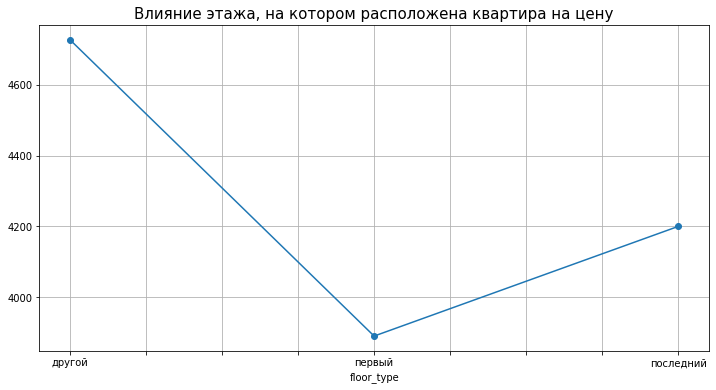

In [83]:
df.groupby('floor_type')['last_price'].median().plot(y='last_price',style='o-', grid=True, figsize=(12,6))
plt.title('Влияние этажа, на котором расположена квартира на цену', fontsize=15)

По графику мы можем сказать, что объекты недвижимости на первых этажах самые дешёвые, на последних этажах дороже, а на всех остальных - самые дорогие.

##### Дата размещения объявления

###### День недели 

Сгруппируем данные по дню недели публикации объявления, вычислим медианное значение и построим график

Text(0.5, 1.0, 'Влияние дня недели размещения объявления на цену')

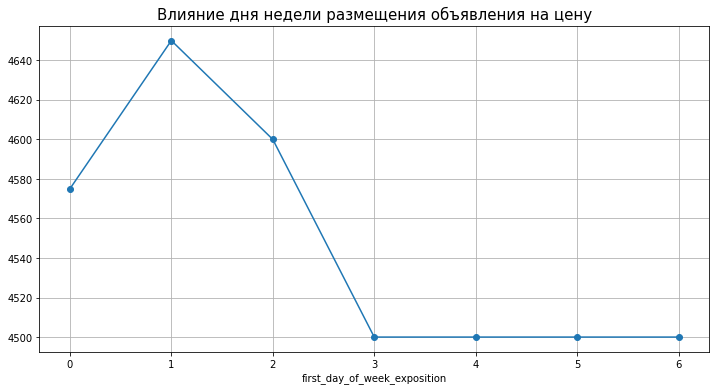

In [84]:
df.groupby('first_day_of_week_exposition')['last_price'].median().plot(y='last_price',style='o-', grid=True, figsize=(12,6))
plt.title('Влияние дня недели размещения объявления на цену', fontsize=15)

По графику мы можем сделать вывод, что объекты недвижимости которые размещались во вторник - самые дорогие, а размещённые с четверга по воскресенье стоят меньше всего.

###### Месяц

Сгруппируем данные по месяцу публикации объявления, вычислим медианное значение и построим график

Text(0.5, 1.0, 'Влияние месяца размещения объявления на цену')

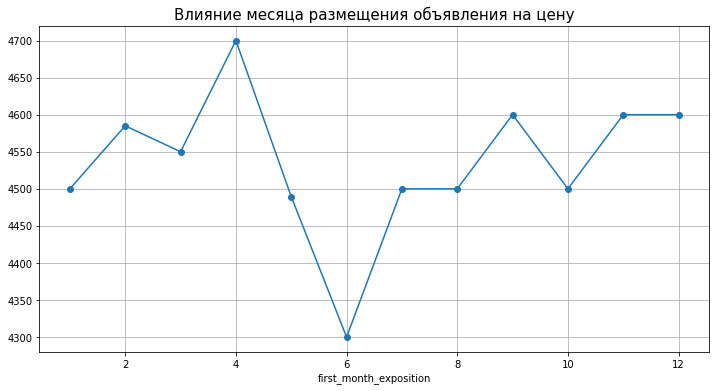

In [85]:
df.groupby('first_month_exposition')['last_price'].median().plot(y='last_price',style='o-', grid=True, figsize=(12,6))
plt.title('Влияние месяца размещения объявления на цену', fontsize=15)

По графику видно, что самые дорогие квартиры размещались в апреле, а потом начинается резкий спад стоимости, который продолжается до июня, а затем снова начинается её рост.

###### Год

Сгруппируем данные по году публикации объявления, вычислим медианное значение и построим график

Text(0.5, 1.0, 'Влияние года размещения объявления на цену')

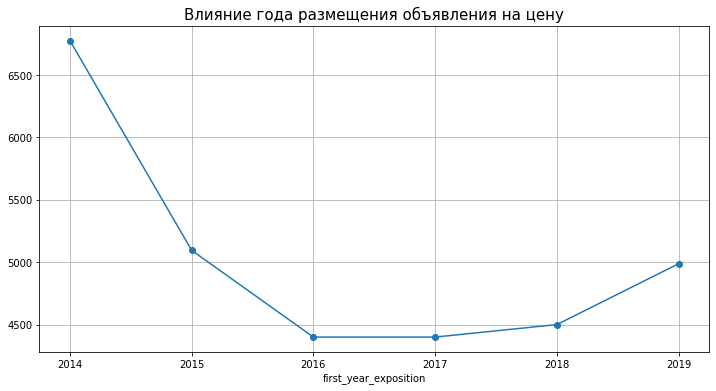

In [86]:
df.groupby('first_year_exposition')['last_price'].median().plot(y='last_price',style='o-', grid=True, figsize=(12,6))
plt.title('Влияние года размещения объявления на цену', fontsize=15)

По графику мы можем сделать вывод, что пик стоимости недвижимости пришёлся на 2014 год, после чего она начала резко падать, но после 2017 года начала медленно восстанавливаться.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населённых пунктов. Выделим населённые пункты с самой высокой стоимостью квадратного метра.

Выберем 10 населённых пунктов с наибольшим числом объявлений

In [87]:
top_localities = df['locality_name_no_dub'].value_counts().head(10)

Создадим срез с объявлениями для 10 населённых пунктов с наибольшим числом объявлений

In [88]:
df_top_localities = df[df['locality_name_no_dub'].isin(top_localities.index)]

Рассчитаем среднюю цену за квадратный метр для каждого из выбранных населённых пунктов

In [89]:
mean_price_per_square_meter = df_top_localities.groupby('locality_name_no_dub')['price_per_square_meter'].mean()

Создадим сводную таблицу с количеством объявлений и средней ценой квадратного метра и переименуем столбцы.

In [90]:
pivot_table = pd.pivot_table(df_top_localities, index='locality_name_no_dub', 
                              values='price_per_square_meter', aggfunc=['count', 'mean'])
pivot_table.columns = ['count', 'mean_price_per_square_meter']
pivot_table.sort_values(by='mean_price_per_square_meter', ascending=False)

,count,mean_price_per_square_meter
locality_name_no_dub,,
санкт-петербург,14837,109.535048
пушкин,355,102.059465
деревня кудрово,299,92.473144
поселок парголово,326,90.332454
поселок мурино,551,85.628004
поселок шушары,438,78.577192
колпино,337,75.332997
гатчина,305,68.851672
всеволожск,395,68.616405


Санкт-Петербург в нашей выборке является городом с самой высокой стоимостью квадратного метра - 109 535 рублей за квадратный метр, а Выборг замыкает топ-10 городов по стоимости квадратного метра с результатом 58 105 рублей за квадратный метр.

#### Выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим их среднюю стоимость на разном удалении от центра. Учтём каждый километр расстояния: узнаем среднюю цену квартир в одном километра от центра, в двух и т.д. Опишем, как стоимость объектов зависит от расстояния до центра города - построим график изменения цены для каждого километра  от центра Санкт-Петербурга

Создадим датасет с квартирами только из Санкт-Петербурга

In [91]:
spb_flats = df[df['locality_name'] == 'Санкт-Петербург']

Сгруппируем данные по расстоянию до центра и рассчитаем среднюю цену квартир для каждого километра

In [92]:
mean_price_per_km = spb_flats.groupby('city_centers_nearest_km')['last_price'].mean()

Построим график изменения цены для каждого километра от центра Санкт-Петербурга

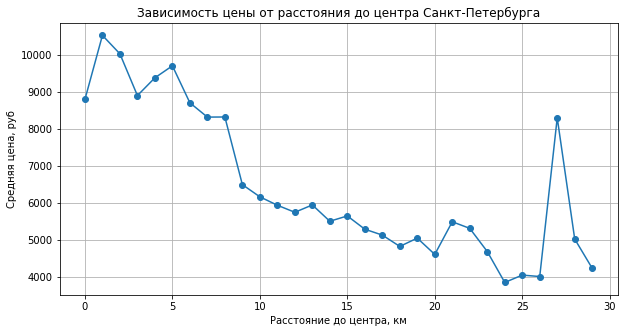

In [93]:
plt.figure(figsize=(10, 5))
plt.plot(mean_price_per_km.index, mean_price_per_km.values, marker='o', linestyle='-')
plt.title('Зависимость цены от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя цена, руб')
plt.grid(True)
plt.show()

**Вывод**

Судя по графику, максимальная стоимость недвижимости в Санкт-Петербурге, находится на расстоянии до 7 км от центра города, далее наблюдается резкое падение стоимости недвижимости и резкий её рост на расстоянии от 26 км (возможно выброс в данных), после этого цена вновь продолжает падение.

### Общий вывод

* Исследовав наш датасет из 23699 строк, мы обнаружили, что имеются незаполненные значения в половине столбцов. Больше всего незаполненных полей было в столбце `is_apartment`, на четверть меньше пропущенных данных было в `parks_nearest` и `ponds nearest`. 

* У 5518 объектов были пропущены одновременно столбцы: `parks_around3000` - число парков в радиусе 3 км и `parks_nearest` - расстояние до ближайшего парка, `ponds_around3000` - число водоёмов в радиусе 3 км и `ponds_nearest` - расстояние до ближайшего водоёма, `city_centers_nearest` -  расстояние до центра города и `airports_nearest` - расстояние до ближайшего аэропорта, возможно произошёл какой-то технический сбой или допущена ошибка в работе программного обеспечения. В столбцах: `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name` - данные заполняют пользователи, предположили, что пользователи пропустили эти пункты, потому что они не относятся к их недвижимости, поэтому заполнили эти параметры 0. У 3181 объектов отсутствуют данные в столбце `days_exposition`, возможно, что эти объекты еще не проданы. 

* Заменили типы данных у столбцов: `last_price` перевели из рублей в тысячи рублей для удобного восприятия данных. Столбец `first_day_exposition`, мы преобразовали их в тип `datetime`, для того, чтобы с ними можно было проводить арифметические операции. 

* В столбце `locality_name` мы избавились от неявных дубликатов

* Добавили в датафрейм новые столбцы: цена одного квадратного метра - `price_per_square_meter`, день недели публикации объявления - `first_day_of_week_exposition`, месяц публикации объявления - `first_month_exposition`, год публикации объявления - `first_year_exposition`, тип этажа квартиры (значения — «первый», «последний», «другой») - `floor_type`, расстояние до центра города в километрах - `city_centers_nearest_km`

* Изучив параметры, мы выяснили, что большинство объектов имеют площадь - 52 квадратных метра, жилая площадь - 30 квадратных метров, площадь кухни - 9 квадратных метров, цена - 4.6 миллионов рублей, количество комнат - 2, высота потолков - 2.65 метра, находятся между первым и последним этажами, в 9 этажных домах, на расстоянии 11 километров от центра города, до ближайшего парка менее 600 метров. 

* Чаще всего объекты недвижимости продаются за 93 дня. Быстрые продажи осуществлялись в период до 44 дней. Продажи от 225 дней можно считать необычайно долгими.

* В большинстве зависимостей присутствует корреляция. Это означает, что площадь, количество комнат, высота потолков влияет на цену квартиры. Объявления которые размещались во вторник,  в апреле 2014 года, расположенные не на крайних этажах - самые дорогие, а размещённые с четверга по воскресенье, в июне 2017 года и расположенные на первом или последнем этажах стоят меньше всего.

* Вывели топ 10 населенных пунктов с наибольшим количеством объявлений. Санкт-Петербург в нашей выборке оказался городом с самой высокой стоимостью квадратного метра - 112 397 рублей за квадратный метр, а Выборг замкнул топ-10 городов по стоимости квадратного метра с результатом 58 105 рублей за квадратный метр.

* Определили по графику, что максимальная стоимость недвижимости в Санкт-Петербурге, находится в радиусе до 7 км от центра города.